In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

In [2]:
#Configuring Settings
pd.set_option("mode.copy_on_write", True)
pd.set_option("display.max_colwidth",200)

In [3]:
# Downloading the datasets
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Importing the dataset
df = pd.read_csv("../../01_Data/01_Raw/raw_tweets.csv")
df.sample(5)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
14506,14854,3,0,3,0,1,RT @Broski5519: Call her 1st thing in da AM.... Let her know dat pussy on yo mind....
2925,2996,3,0,3,0,1,@DEVIN__the_DUDE You ready to make this stats test our bitch?!
21602,22065,3,0,3,0,1,The power of Christ compels you to pop that pussy.
1845,1883,6,0,6,0,1,&#8220;@lovelyatotheb: This guy said he's slept with 300 girls.. Oh ok let me puke now.&#8221;I know a girl that had 70 dudes slut/whore not hoe
9277,9533,3,0,3,0,1,Fuck that shit I'm out this bitch


In [5]:
# Dropping the columns that are not needed
df = df[["class", "tweet"]]
df.sample(5)

,class,tweet
13981,1,RT @05proFESSOR: @idontbekaren @kelseysocrazy .... this is what all of my bitches say hahaha http://t.co/dHK7eU97Dc
1796,1,"&#8220;@itsDeSha__: I don't take people niggas bitches don't play about they niggas , specially they baby daddies &#128557;&#128514;&#128514;&#128514;&#8221;No BS"
10991,2,"I took 2 ""Rebel vs. Yankee"" tests (40 questions, accents, word usage) and scored a total % of 47.5% Rebel vs. 52.5% Yankee in southern Pa."
13342,1,Niggas put on wigs and act like bitches for retweets &#128530;that shit fu
11500,1,"If I had hair, I would seriously go for a perm now. Genetics is a stone cold bitch."


In [6]:
#get rows which have https in tweet
df.loc[df["tweet"].str.contains("https", na=False)].sample(5)

,class,tweet
432,2,"""Chinese Maverick: We were communicating Comrade , u know giving the imperialist Yanks the Birdie"" https://t.co/38GZ1jerPS"
16257,1,RT @LmaoSoFunny: Kicked the soul outta dis bitch https://t.co/5xWHYdP7U8
336,2,"""@hxhassan: Jihadi patron Hajjaj al-Ajmi is arrested at Kuwait airport https://t.co/ZmloKfWDQl"""
15651,2,RT @India_MSM: can Raheel mock Propphet Muhammad in same way as he mocked Lord Ram and Sita https://t.co/IjeAhR3cJI &#8230; will he apologise ?&#8230;
15540,1,"RT @HuhWhatsACondom: BRUUUUUUH &#128557;&#128557;&#128557;&#128557;&#128514;&#128514;&#128514;&#128514; &#8220;@MySportsLegion: Kobe, last night yelling at Dwight Howard: ""You a bitch ass n*****""?..."


In [7]:
df.iloc[12955, :]

class                                                                                                                                             1
tweet    My baby Lexy. She is a whole ain't shit bitch in the winter. Sorry ass RWD that's her only flaw. Still love you tho http://t.co/5UGfhrdrxT
Name: 12955, dtype: object

# Data Cleaning Process Starts Here

In [8]:
# create helper colums for cleaning
df["clean_tweet"] = df["tweet"].astype(str)

In [9]:
# Convert all the text to lower case
df["clean_tweet"] = df["clean_tweet"].str.lower()

In [10]:
# removing URLS
def remove_URL(text):
    text = re.sub(r"http\S+", "", text)
    return text


df["clean_tweet"] = df["clean_tweet"].apply(remove_URL)

In [11]:
# removing mentions
def remove_mentions(text):
    return re.sub(r"@\w+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_mentions)

In [12]:
# removing hashtags
def remove_hashtags(text):
    return re.sub(r"#\w+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_hashtags)

In [13]:
# removing special characters and numbers
spl_chrs = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"


def remove_spl_chrs(text):
    text = "".join([_ for _ in text if _ not in spl_chrs])
    text = re.sub("[0-9]+", "", text)
    return text


df["clean_tweet"] = df["clean_tweet"].apply(lambda x: remove_spl_chrs(x))

In [14]:
# removing stopwords
stop = stopwords.words("english")
df["clean_tweet"] = df["clean_tweet"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop)])
)

In [15]:
# removing retweet
def remove_rt(text):
    return re.sub("^[rt]+", "", text)


df["clean_tweet"] = df["clean_tweet"].apply(remove_rt)

In [16]:
df["tokenized"] = df["clean_tweet"].apply(word_tokenize)

In [17]:
df.sample(5)

,class,tweet,clean_tweet,tokenized
23319,1,You got niggas and I got bitches.\nPARTYNEXTDOOR ain't never lied.,got niggas got bitches partynextdoor aint never lied,"[got, niggas, got, bitches, partynextdoor, aint, never, lied]"
5835,1,@denise_nigga69 true dat nig,ue dat nig,"[ue, dat, nig]"
11087,1,I wish I smoked so I could hit more smoker loser hoes,wish smoked could hit smoker loser hoes,"[wish, smoked, could, hit, smoker, loser, hoes]"
10739,1,I loved her as much and as long as I could ma niggah .,loved much long could niggah,"[loved, much, long, could, niggah]"
16595,0,RT @NYTMinusContext: kill whitey,kill whitey,"[kill, whitey]"


In [18]:
#Confirm if HTTPs are removed
df.iloc[12955,:]

class                                                                                                                                                   1
tweet          My baby Lexy. She is a whole ain't shit bitch in the winter. Sorry ass RWD that's her only flaw. Still love you tho http://t.co/5UGfhrdrxT
clean_tweet                                                                baby lexy whole aint shit bitch winter sorry ass rwd thats flaw still love tho
tokenized                                                  [baby, lexy, whole, aint, shit, bitch, winter, sorry, ass, rwd, thats, flaw, still, love, tho]
Name: 12955, dtype: object

# Data Stemming and Lematization

In [19]:
# Stemming
ps = nltk.PorterStemmer()


def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


df["tokenized"] = df["tokenized"].apply(lambda x: stemming(x))

In [20]:
# Lemmatization
wn = nltk.WordNetLemmatizer()


def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text


df["tokenized"] = df["tokenized"].apply(lambda x: lemmatizer(x))

In [21]:
# regenrate the clean tweet
def regen_tweet(text):
    return " ".join(text)
df["clean_tweet"] = df["tokenized"].apply(lambda x: regen_tweet(x))

In [22]:
df.sample(5)

,class,tweet,clean_tweet,tokenized
3509,1,@IndicaMangoes they still fucking trash. I cant eat those to save my life.,still fuck trash cant eat save life,"[still, fuck, trash, cant, eat, save, life]"
17199,1,RT @SarahMcintiree: A sideline bitch will tell you everything you need to hear if you just listen. She ultimately wants your man she dgaf a&#8230;,sidelin bitch tell everyth need hear listen ultim want man dgaf,"[sidelin, bitch, tell, everyth, need, hear, listen, ultim, want, man, dgaf]"
1106,1,&#8220;@Ann_E_Lizabeth: I can't stop being a lil bitch&#8221;,cant stop lil bitch,"[cant, stop, lil, bitch]"
16310,2,RT @Luke_Grossman52: That's what sports are about. Forget the arrogance &amp; trash talking. Its about making people feel like they are a part &#8230;,that sport forget arrog amp trash talk make peopl feel like part,"[that, sport, forget, arrog, amp, trash, talk, make, peopl, feel, like, part]"
21741,1,These bitches so redundant,bitch redund,"[bitch, redund]"


# Data Selection

In [23]:
# Dropping category 0 from the dataset since it has low values as seen in the EDA
df = df[df["class"] != 0]

In [24]:
df["Length"] = df["tokenized"].apply(len)

In [25]:
# Dropping tweets with 0 length
df = df[df["Length"] != 0]

In [26]:
# Generating simple label for easy identification
df["offensive"] = df["class"].apply(lambda x: "Yes" if x == 1 else "No")

In [27]:
df.sample(5)

,class,tweet,clean_tweet,tokenized,Length,offensive
13560,1,"Oh, and I'm back, bitch. No one walks all over me ever again. Ever.",oh im back bitch one walk ever ever,"[oh, im, back, bitch, one, walk, ever, ever]",8,Yes
2452,2,"@AngryWillHelms Genius, the politically correct term would be ""intellectually disabled."" It's highly offensive to use the word retarded.",geniu polit correct term would intellectu disabl highli offens use word retard,"[geniu, polit, correct, term, would, intellectu, disabl, highli, offens, use, word, retard]",12,No
2841,2,@Chink_19 chink thats better then having the rug rats running around yah crib girl enjoy life lol,chink that better rug rat run around yah crib girl enjoy life lol,"[chink, that, better, rug, rat, run, around, yah, crib, girl, enjoy, life, lol]",13,No
4843,1,"@Tae_Rhodes @thereal_2raw you gay, Gabrielle bad as fuck. Even though the other bitch bad you can't cheat on a dime..foh lol",gay gabriel bad fuck even though bitch bad cant cheat dimefoh lol,"[gay, gabriel, bad, fuck, even, though, bitch, bad, cant, cheat, dimefoh, lol]",12,Yes
20187,1,"RT @tic14tac: Guys be like ""Man, fuck that bitch!"" &#128563; But deep inside, they miss that ""bitch"", still love that ""bitch"", &amp; want that ""bitch"" &#8230;",guy like man fuck bitch deep insid miss bitch still love bitch amp want bitch,"[guy, like, man, fuck, bitch, deep, insid, miss, bitch, still, love, bitch, amp, want, bitch]",15,Yes


In [28]:
# dropping extra columns
df2 = df[["offensive", "class", "tokenized", "clean_tweet"]]

In [29]:
# View Distribution of the classes
df2["offensive"].value_counts()

offensive
Yes    19181
No      4156
Name: count, dtype: int64

In [30]:
# create a new random sample with 4000 rows from each class
df3 = (
    df2.groupby("offensive")
    .apply(lambda x: x.sample(n=4000, random_state=42))
    .reset_index(drop=True)
)

In [31]:
df3["offensive"].value_counts()

offensive
No     4000
Yes    4000
Name: count, dtype: int64

In [32]:
df3.sample(5)

,offensive,class,tokenized,clean_tweet
2548,No,2,"[ight, link, would, trash, bin, gotcha]",ight link would trash bin gotcha
4126,Yes,1,"[aint, got, ta, dyke, like, hoe]",aint got ta dyke like hoe
5284,Yes,1,"[peopl, act, like, didnt, know, hoe, allen, go, cav, month, ago]",peopl act like didnt know hoe allen go cav month ago
2141,No,2,"[fuzzi, wuzzi, kitten, want, know, raven, like, write, desk, find]",fuzzi wuzzi kitten want know raven like write desk find
891,No,2,"[shi, glizzi]",shi glizzi


In [33]:
# Replacing the class labels 2 with 0 for easy use in models
df3["class"] = df3["class"].replace(2, 0)

In [34]:
#confirm the mapping
df3[['class','offensive']].value_counts().reset_index()

,class,offensive,count
0,0,No,4000
1,1,Yes,4000


In [35]:
# Splitting the dataset into train and test sets at 80:20 ratio
train, test = train_test_split(
    df3, test_size=0.20, stratify=df3["offensive"], random_state=42
)

In [36]:
train["offensive"].value_counts()

offensive
Yes    3200
No     3200
Name: count, dtype: int64

In [37]:
test["offensive"].value_counts()

offensive
Yes    800
No     800
Name: count, dtype: int64

In [38]:
# Saving the datasets
train.to_csv("../../01_Data/02_Processed/train.csv", index=False)
test.to_csv("../../01_Data/02_Processed/test.csv", index=False)

# EDA Plots

In [39]:
df2.sample(5)

,offensive,class,tokenized,clean_tweet
23158,Yes,1,"[ye, lawd, god, took, extra, time, lip, like, kyli, jenner, bitch, im, black]",ye lawd god took extra time lip like kyli jenner bitch im black
10677,No,2,"[like, yanke, toinight]",like yanke toinight
5211,No,2,"[whatev, neymar, trash]",whatev neymar trash
21260,Yes,1,"[k, fuck, money, bitch]",k fuck money bitch
4787,Yes,1,"[ever, fav, fuckin, cunt]",ever fav fuckin cunt


## Length Distributions

In [40]:
#Avregae length of tweets by category
len_no = df[df["offensive"] == "No"]["Length"].mean()
len_yes= df[df["offensive"] == "Yes"]["Length"].mean()

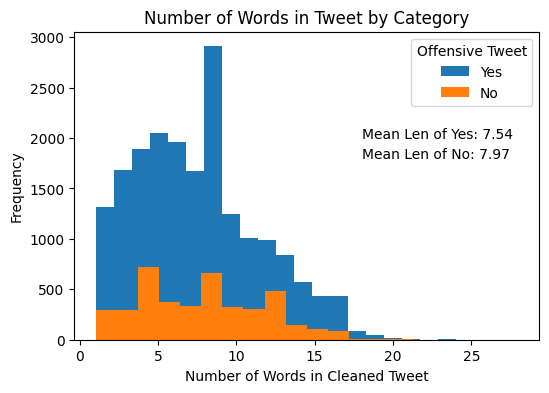

In [41]:
#plotting distrubution of words by category
plt.figure(figsize=(6, 4))
plt.hist(df[df["offensive"] == "Yes"]["Length"], bins=20, label="Yes")
plt.hist(df[df["offensive"] == "No"]["Length"], bins=20, label="No")
plt.title("Number of Words in Tweet by Category")
plt.xlabel("Number of Words in Cleaned Tweet")
plt.ylabel("Frequency")
plt.legend(title="Offensive Tweet")
plt.text(18, 2000, f"Mean Len of Yes: {len_yes:.2f}")
plt.text(18, 1800, f"Mean Len of No: {len_no:.2f}")

#saving the plot
plt.savefig("../../03_Plots/01_EDA/01_Len.png", dpi=300, bbox_inches="tight")

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

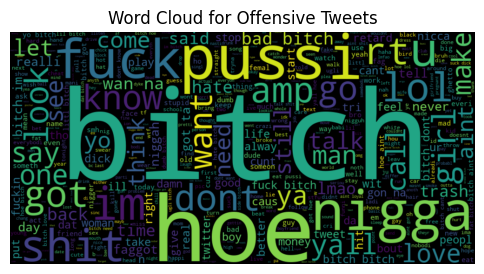

In [42]:
#Word cloud for offensive tweets
plt.figure(figsize=(6,4))
yes_words=' '.join(df2[df2['offensive']=="Yes"].clean_tweet.tolist())
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
yes_words=WC.generate(yes_words)
plt.imshow(yes_words,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Offensive Tweets')
plt.savefig('../../03_Plots/01_EDA/02_WC-yes.png',dpi=300,bbox_inches='tight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

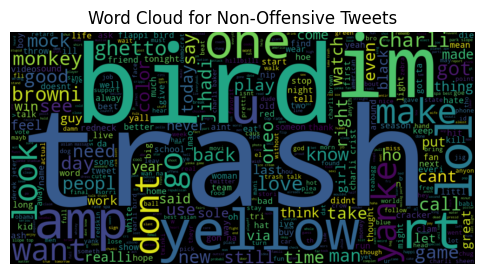

In [43]:
#Word cloud for non-offensive tweets
plt.figure(figsize=(6,4))
no_words=' '.join(df2[df2['offensive']=="No"].clean_tweet.tolist())
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
no_words=WC.generate(no_words)
plt.imshow(no_words,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Offensive Tweets')
plt.savefig('../../03_Plots/01_EDA/03_WC-no.png', dpi=300, bbox_inches='tight')
plt.show

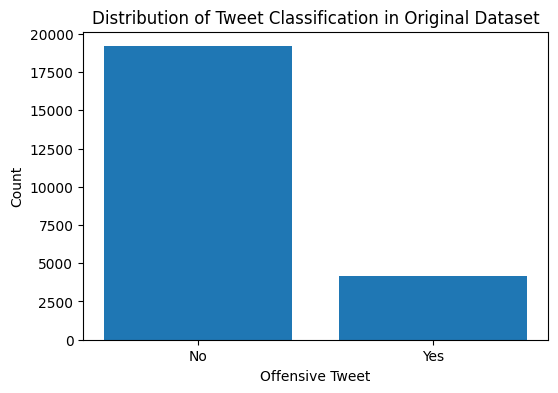

In [44]:
#Bar chartas of the distribution of classes in the original and model datasets
plt.figure(figsize=(6,4))
plt.bar(df2['offensive'].value_counts().index,df2['offensive'].value_counts().values)
plt.title('Distribution of Tweet Classification in Original Dataset')
plt.xlabel('Offensive Tweet')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.savefig('../../03_Plots/01_EDA/04_orginalClass.png', dpi=300, bbox_inches='tight')
plt.show()

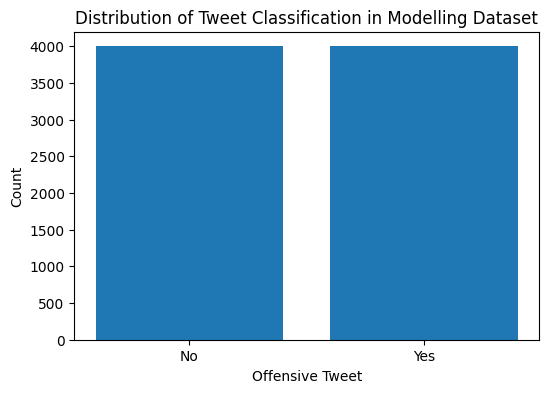

In [45]:
#Bar chartas of the distribution of classes in the original and model datasets
plt.figure(figsize=(6,4))
plt.bar(df3['offensive'].value_counts().index,df3['offensive'].value_counts().values)
plt.title('Distribution of Tweet Classification in Modelling Dataset')
plt.xlabel('Offensive Tweet')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.savefig('../../03_Plots/01_EDA/05_modelClass.png', dpi=300, bbox_inches='tight')
plt.show()